In [8]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/owid-covid-data.csv'

import pandas as pd

df = pd.read_csv(file_path)
# Check column names
print(df.columns)

# Preview the first 5 rows
print(df.head())

# Identify missing values
print(df.isnull().sum())

Mounted at /content/drive
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccina

In [9]:
# Filter countries of interest
countries = ['Austria', 'India', 'Angola']
df_filtered = df[df['location'].isin(countries)]

# Drop rows with missing dates or total cases
df_filtered = df_filtered.dropna(subset=['date', 'total_cases'])

# Convert 'date' to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Fill or interpolate missing numeric values
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_filtered[numeric_cols] = df_filtered[numeric_cols].interpolate(method='linear', limit_direction='forward')

# Confirm changes
print(df_filtered.info())
print(df_filtered.head())


<class 'pandas.core.frame.DataFrame'>
Index: 3420 entries, 7263 to 121878
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    3420 non-null   object        
 1   continent                                   3420 non-null   object        
 2   location                                    3420 non-null   object        
 3   date                                        3420 non-null   datetime64[ns]
 4   total_cases                                 3420 non-null   float64       
 5   new_cases                                   3420 non-null   float64       
 6   new_cases_smoothed                          3420 non-null   float64       
 7   total_deaths                                3369 non-null   float64       
 8   new_deaths                                  3420 non-null   float64       
 9   new_deat

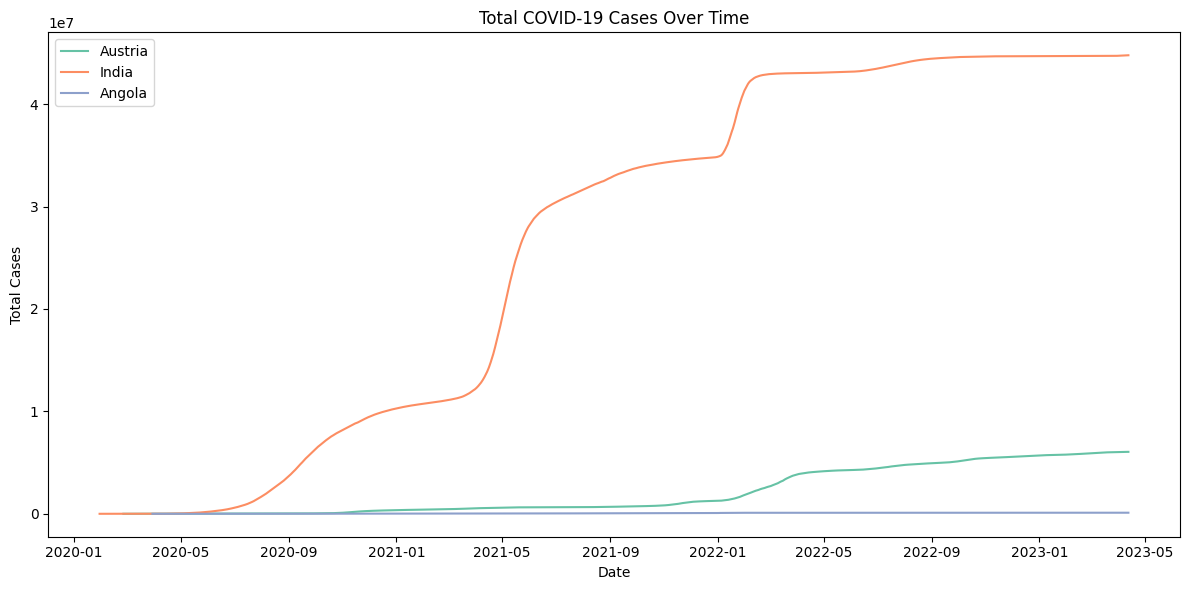

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style settings
sns.set_palette("Set2")

# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

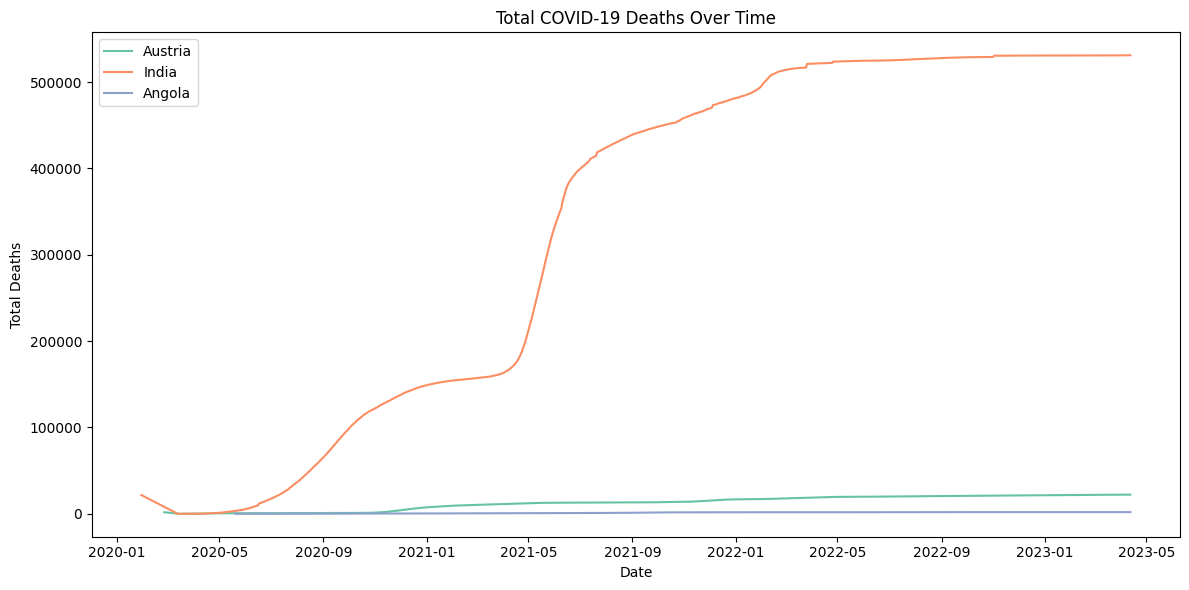

In [11]:
# Plot total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

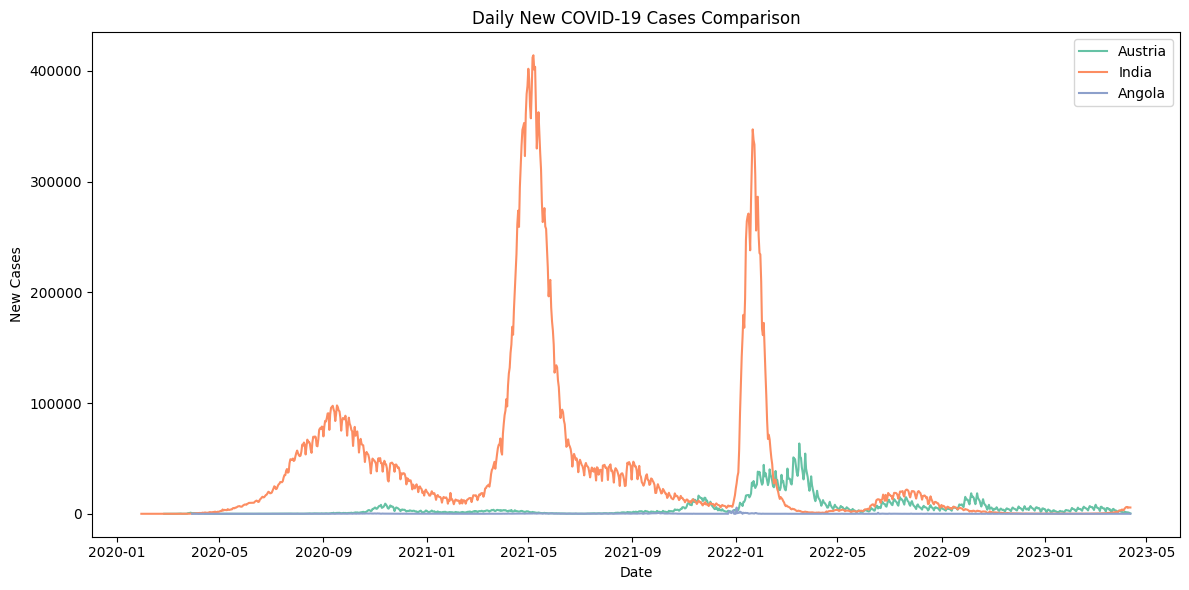

In [12]:
# Daily New Cases Comparison
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Comparison')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

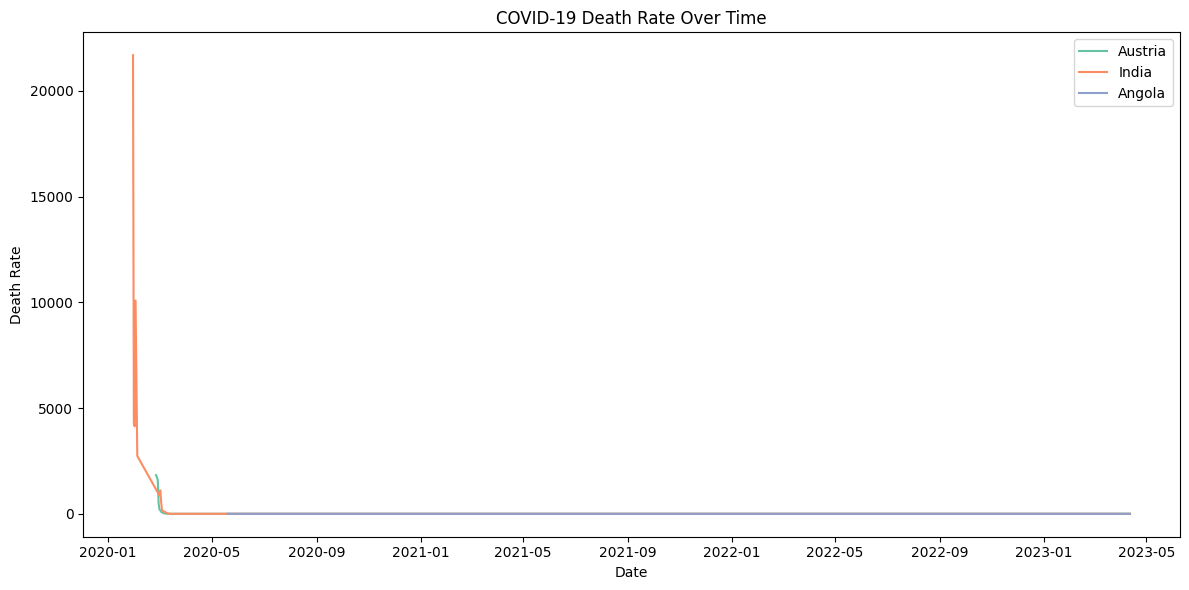

In [13]:
# Death Rate Calculation
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()


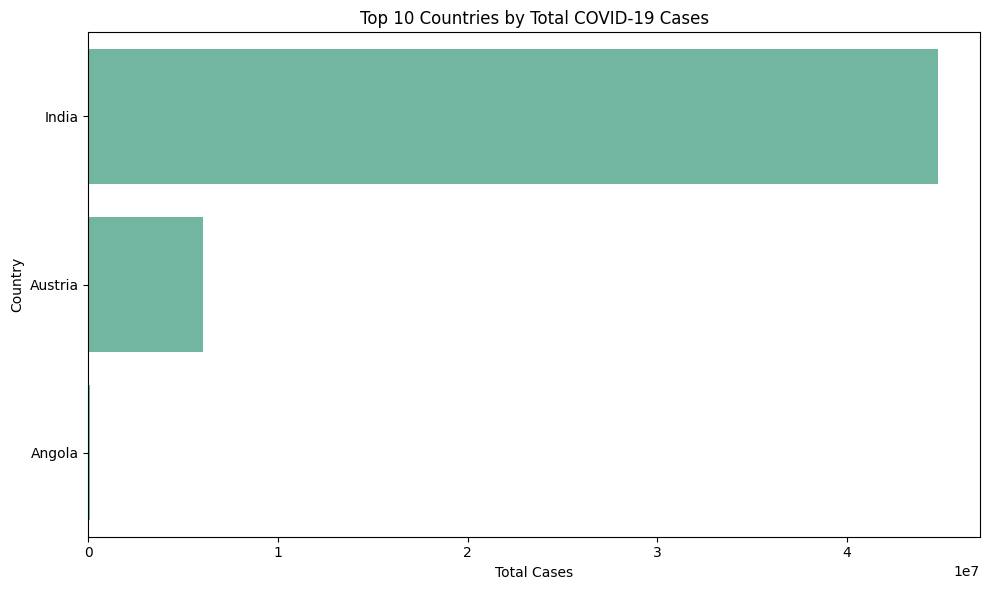

In [14]:
# Top Countries by Total Cases
# Last available date for each country
latest_data = df_filtered.groupby('location').last().reset_index()
top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_cases', y='location', data=top_countries)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

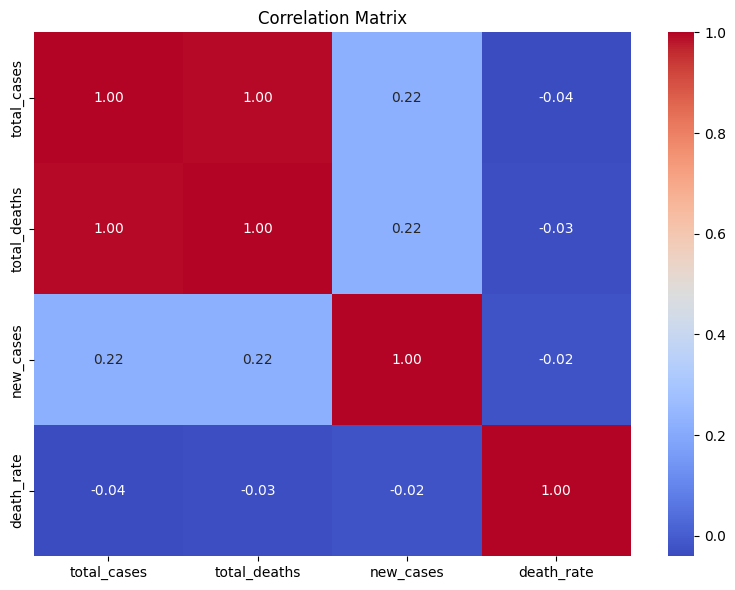

In [15]:
# Calculate correlations on relevant columns
corr = df_filtered[['total_cases', 'total_deaths', 'new_cases', 'death_rate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


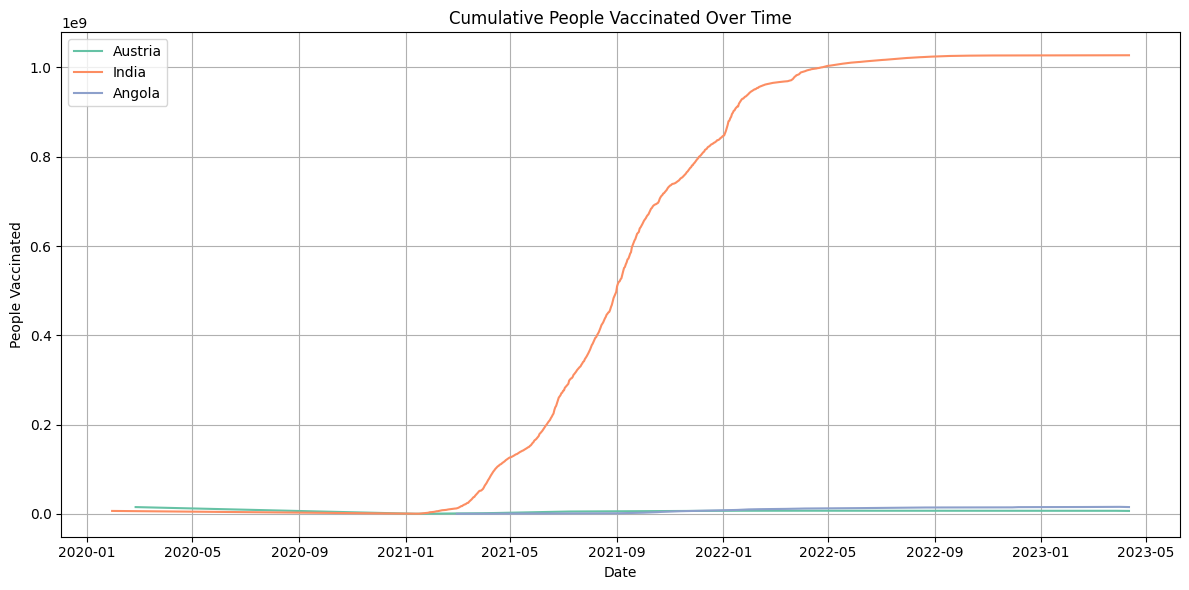

In [16]:
# Plot Cumulative Vaccinations Over Time
plt.figure(figsize=(12, 6))

for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['people_vaccinated'], label=country)

plt.title('Cumulative People Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-17-f4a7d4a2488b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_vax, x='pct_vaccinated', y='location', palette='Blues_d')


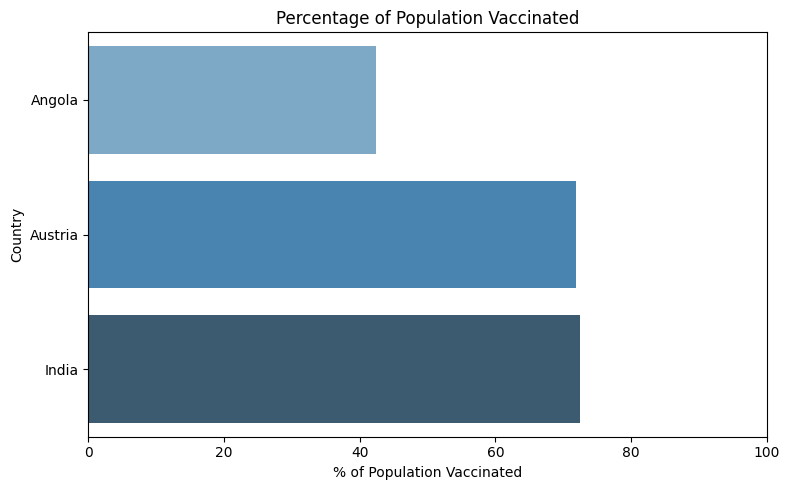

In [17]:
# Compare % Vaccinated Population

# Get latest available data per country
latest_vax = df_filtered.sort_values('date').groupby('location').tail(1)

# Calculate % vaccinated
latest_vax['pct_vaccinated'] = (latest_vax['people_vaccinated'] / latest_vax['population']) * 100

plt.figure(figsize=(8, 5))
sns.barplot(data=latest_vax, x='pct_vaccinated', y='location', palette='Blues_d')

plt.title('Percentage of Population Vaccinated')
plt.xlabel('% of Population Vaccinated')
plt.ylabel('Country')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

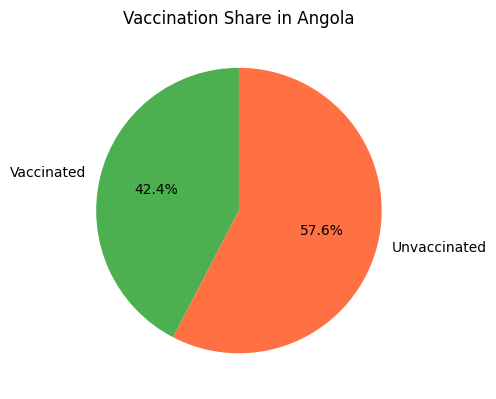

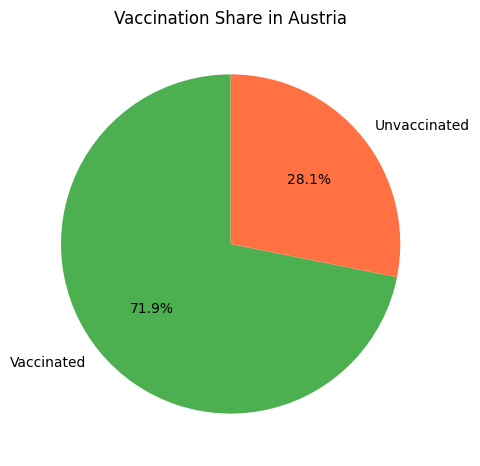

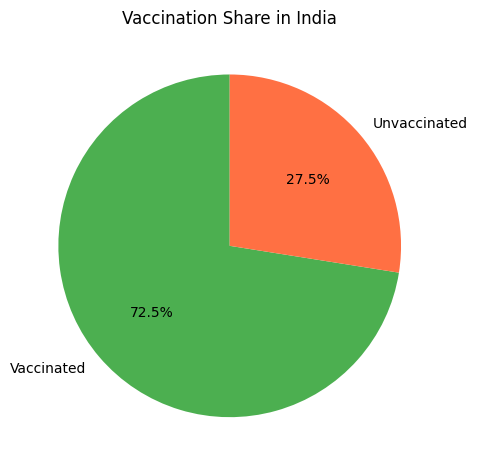

In [18]:
# Pie Charts (Vaccinated vs. Unvaccinated)
for _, row in latest_vax.iterrows():
    vaccinated = row['people_vaccinated']
    unvaccinated = row['population'] - vaccinated
    labels = ['Vaccinated', 'Unvaccinated']
    sizes = [vaccinated, unvaccinated]

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF7043'])
    plt.title(f'Vaccination Share in {row["location"]}')
    plt.tight_layout()
    plt.show()

In [20]:
import plotly.express as px

# Get the latest date per country
latest_df = df.sort_values('date').groupby('location').tail(1)

# Keep only relevant columns
choropleth_df = latest_df[['iso_code', 'location', 'total_cases', 'people_vaccinated', 'population']].copy()

# Calculate metrics
choropleth_df['cases_per_100k'] = (choropleth_df['total_cases'] / choropleth_df['population']) * 100000
choropleth_df['vaccination_rate'] = (choropleth_df['people_vaccinated'] / choropleth_df['population']) * 100

fig = px.choropleth(
    choropleth_df,
    locations='iso_code',
    color='cases_per_100k',
    hover_name='location',
    color_continuous_scale='Reds',
    title='COVID-19 Cases per 100,000 People (Latest Available Data)',
    labels={'cases_per_100k': 'Cases per 100k'}
)
fig.update_geos(showframe=False, showcoastlines=False)
fig.show()


### 📝 Summary of Findings
1. **India** had the highest number of total cases among the selected countries.
2. **Austria** achieved a faster vaccination rollout compared to **Angola**.
3. The death rate in some countries appeared unusually low, possibly due to underreporting or limited testing.
4. **Angola** showed a delayed and slower vaccination curve, which could be linked to access and distribution issues.
5. The **daily new cases** trends showed multiple spikes for India, aligning with known COVID-19 waves.

### 🔍 Notable Observations

- Some countries report **missing or zero values** for key metrics like deaths or vaccinations, indicating data quality issues.
- **Vaccination rates** above 70% were observed in some countries, showing effective public health campaigns.

